# CSCI 490 Assignment 4
#### Instructor: Dr. David Koop
#### Programmer: Dominykas Karalius
#### Due at 11:59pm on April 7th, Tuesday
#### Z1809478

# 1. Data Integration (Cases & Population) (30 pts)

In [225]:
import os
from urllib.request import urlretrieve
import pandas as pd
import numpy as np

urls = ['http://faculty.cs.niu.edu/~dakoop/cs680-2020sp/a4/bing-covid-2020-03-22.csv',
        'http://faculty.cs.niu.edu/~dakoop/cs680-2020sp/a4/world-bank-population-2018.csv',
        'http://databank.worldbank.org/data/download/catalog/cckp_historical_data_0.xls',
        'http://faculty.cs.niu.edu/~dakoop/cs680-2020sp/a4/owid-2020-03-22.csv',
        'http://faculty.cs.niu.edu/~dakoop/cs680-2020sp/a4/jhu-2020-03-22.csv',
        'http://faculty.cs.niu.edu/~dakoop/cs680-2020sp/a4/wiki-2020-03-22.csv',
        'http://faculty.cs.niu.edu/~dakoop/cs680-2020sp/a4/country-codes.csv']
for url in urls:
    local_fname = url[url.rfind('/')+1:]
    if not os.path.exists(local_fname):
        urlretrieve(url, local_fname)
covid_df = pd.read_csv('bing-covid-2020-03-22.csv')
pop_df = pd.read_csv('world-bank-population-2018.csv')

### a. Merging (10 pts)

Your job is to integrate these data sets so that we have data with both COVID-19 cases and population. Use a merge that ensures that every row of the COVID-19 dataset remains, regardless of whether we have data about its population. Note that the COVID-19 dataset also has names for “areas” that are not necessarily countries (e.g. the ‘Diamond Princess’, a cruise ship which had a number of cases). You may use displayName from the COVID-19 dataset here to match (country also works to match “Czech Republic” but then fails on “China”). Name the merged data frame merged.

In [88]:
merged = pd.merge(covid_df, pop_df, how='left', left_on='displayName', right_on='Country Name')
merged

,id,displayName,areas,totalConfirmed,totalDeaths,totalRecovered,lastUpdated,lat,long,country,parentId,Country Name,Country Code,"Population ages 0-14, total","Population ages 15-64, total","Population ages 65 and above, total","Population, total"
0,chinamainland,China (mainland),[],81008,3255,71740,2020-03-21T22:45:34.992Z,36.563116,103.735807,China Mainland,world,NaN,NaN,NaN,NaN,NaN,NaN
1,italy,Italy,[],53578,4825,6072,2020-03-21T22:45:34.992Z,43.529028,12.162184,Italy,world,Italy,ITA,8054956.0,38627195.0,13749132.0,60431283.0
2,spain,Spain,[],25496,1381,2125,2020-03-21T22:45:34.992Z,40.387696,-3.557391,Spain,world,Spain,ESP,6852973.0,30816411.0,9054365.0,46723749.0
3,unitedstates,United States,"[{'id': 'alabama_unitedstates', 'displayName':...",25471,308,147,2020-03-21T22:45:35.447Z,39.495915,-98.989979,United States,world,United States,USA,61209886.0,214240052.0,51717496.0,327167434.0
4,germany,Germany,[],22364,84,239,2020-03-21T22:45:34.992Z,51.121806,10.400695,Germany,world,Germany,DEU,11295637.0,53834326.0,17797959.0,82927922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,papuanewguinea,Papua New Guinea,[],1,0,0,2020-03-21T22:45:34.992Z,-6.613677,144.261442,Papua New Guinea,world,Papua New Guinea,PNG,3082432.0,5227373.0,296511.0,8606316.0
164,stvincentandthegrenadines,Saint Vincent and the Grenadines,[],1,0,0,2020-03-21T22:45:34.992Z,13.279378,-61.175686,St. Vincent and the Grenadines,world,NaN,NaN,NaN,NaN,NaN,NaN
165,somalia,Somalia,[],1,0,0,2020-03-21T22:45:34.992Z,6.533645,48.076172,Somalia,world,Somalia,SOM,6990285.0,7586638.0,431231.0,15008154.0
166,uganda,Uganda,[],1,0,0,2020-03-21T22:45:34.992Z,1.277275,32.389703,Uganda,world,Uganda,UGA,20050194.0,21843695.0,829251.0,42723140.0


### b. Cleanup (10 pts)

You should find 25 “areas” that do not have matched population data. You can find these by checking for null entries in the population part of the merged data. If merged is the data frame, merged[merged['Country Code'].isnull()] will show these rows. Some of these are due to different names, and others do not exist in the dataset (due to the nature of the area or decisions by the World Bank). Let’s try to fix those countries that have data. Use any means to find the country codes the World Bank uses for the countries. You can also find these codes here on Wikipedia.

In [99]:
translate = {'Jersey': 'JEY',
             'Guernsey': 'GGY',
             'Kyrgyzstan': 'KGZ',
             'China (mainland)': 'CHN',
             'Saint Vincent and the Grenadines': 'VCT',
             'Saint Lucia': 'LCA',
             'Congo': 'COG',
             'Cape Verde': 'CPV',
             'Bahamas': 'BHS',
             'Côte d’Ivoire': 'CIV',
             'Iran': 'IRN',
             'South Korea': 'KOR',
             'Diamond Princess': None,
             'Czechia': 'CZE',
             'Hong Kong SAR': 'HKG',
             'Egypt': 'EGY',
             'Russia': 'RUS',
             'Taiwan': 'TWN',
             'Slovakia': 'SVK',
             'Brunei': 'BRN',
             'Palestinian Authority': 'PSE',
             'Venezuela': 'VEN',
             'Macao SAR': 'MAC',
             'Ivory Coast': 'CIV',
             'Congo (DRC)': 'COD',
             'Congo': 'COG',
             'Vatican City': 'VAT'}

covid_df['countryCode'] = merged['Country Code']
covid_df.loc[:,'countryCode'].update(covid_df['displayName'].map(translate))
merged = pd.merge(covid_df, pop_df, how='left', left_on='countryCode', right_on='Country Code')

Finally, merge the covid_df and pop_df again but using the countryCode and Country Code columns this time. Again, we want to preserve all rows from the COVID-19 data frame regardless of whether they have matching population data. If you call your final merged data frame merged, you can find the 25 countries that were missing data via:

fields = ['displayName',
          'Population ages 0-14, total',
          'Population ages 15-64, total',
          'Population ages 65 and above, total',
          'Population, total']
merged[merged['displayName'].isin(translate.keys())][fields]

In [100]:
fields = ['displayName',
          'Population ages 0-14, total',
          'Population ages 15-64, total',
          'Population ages 65 and above, total',
          'Population, total']
merged[merged['displayName'].isin(translate.keys())][fields]

,displayName,"Population ages 0-14, total","Population ages 15-64, total","Population ages 65 and above, total","Population, total"
0,China (mainland),248978380.0,991653198.0,152098421.0,1.392730e+09
5,Iran,20021891.0,56719380.0,5058998.0,8.180027e+07
7,South Korea,6698809.0,37491389.0,7445058.0,5.163526e+07
22,Czechia,1656185.0,6905907.0,2063603.0,1.062570e+07
27,Diamond Princess,NaN,NaN,NaN,NaN
46,Russia,25881914.0,97394403.0,21201732.0,1.444780e+08
48,Egypt,33265916.0,60010342.0,5147337.0,9.842360e+07
49,Hong Kong SAR,886736.0,5306904.0,1257360.0,7.451000e+06
57,Slovakia,841353.0,3754331.0,851327.0,5.447011e+06
64,Taiwan,NaN,NaN,NaN,NaN


## c. Analysis (10 pts)

Now, compute the fraction of the population that has tested positive for COVID-19. Note that this does not necessarily indicate the total fraction of people who have or have had COVID-19 because some countries test different numbers of people via different criteria. Sort these values in a descending order, ignoring NaN or inf values. Show the five countries that have the highest fractions of their populations that have confirmed cases.

In [101]:
merged['Fraction of Confirmed Cases'] = (merged['totalConfirmed'] / merged['Population, total'])
merged['Fraction of Confirmed Cases'] = merged['Fraction of Confirmed Cases'].replace(np.inf, np.nan)
merged = merged.sort_values(by=['Fraction of Confirmed Cases'], ascending=False)
merged.dropna(subset=['Fraction of Confirmed Cases'])

,id,displayName,areas,totalConfirmed,totalDeaths,totalRecovered,lastUpdated,lat,long,country,parentId,countryCode,Country Name,Country Code,"Population ages 0-14, total","Population ages 15-64, total","Population ages 65 and above, total","Population, total",Fraction of Confirmed Cases
35,iceland,Iceland,[],473,0,22,2020-03-21T22:45:34.992Z,64.879642,-18.225616,Iceland,world,ISL,Iceland,ISL,70122.0,231140.0,52312.0,353574.0,1.337768e-03
28,luxembourg,Luxembourg,[],670,8,6,2020-03-21T22:45:34.992Z,49.776825,6.092341,Luxembourg,world,LUX,Luxembourg,LUX,96500.0,425033.0,86195.0,607728.0,1.102467e-03
1,italy,Italy,[],53578,4825,6072,2020-03-21T22:45:34.992Z,43.529028,12.162184,Italy,world,ITA,Italy,ITA,8054956.0,38627195.0,13749132.0,60431283.0,8.865938e-04
8,switzerland,Switzerland,[],6575,79,15,2020-03-21T22:45:34.992Z,46.800210,8.229198,Switzerland,world,CHE,Switzerland,CHE,1269898.0,5660591.0,1586054.0,8516543.0,7.720269e-04
2,spain,Spain,[],25496,1381,2125,2020-03-21T22:45:34.992Z,40.387696,-3.557391,Spain,world,ESP,Spain,ESP,6852973.0,30816411.0,9054365.0,46723749.0,5.456754e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,chad,Chad,[],1,0,0,2020-03-21T22:45:34.992Z,15.368435,18.667134,Chad,world,TCD,Chad,TCD,7294091.0,7799731.0,383929.0,15477751.0,6.460887e-08
153,sudan,Sudan,[],2,1,0,2020-03-21T22:45:34.992Z,15.983182,29.949295,Sudan,world,SDN,Sudan,SDN,16933296.0,23371257.0,1496980.0,41801533.0,4.784514e-08
162,niger,Niger,[],1,0,0,2020-03-21T22:45:34.992Z,17.420582,9.400393,Niger,world,NER,Niger,NER,11217956.0,10642596.0,582396.0,22442948.0,4.455743e-08
161,nepal,Nepal,[],1,0,1,2020-03-21T22:45:34.992Z,28.259138,83.944163,Nepal,world,NPL,Nepal,NPL,8542720.0,17936371.0,1608781.0,28087872.0,3.560255e-08


Finally, plot the fraction of people over 65 versus the fraction testing positive. First compute the fraction of people over 65. Then, use pandas’ plot.scatter method to do this. Try setting the optional argument ylim to (0,0.0015) to better see the data.

In [102]:
merged['Fraction over 65'] = (merged['Population ages 65 and above, total'] / merged['Population, total'])

(0, 0.3)

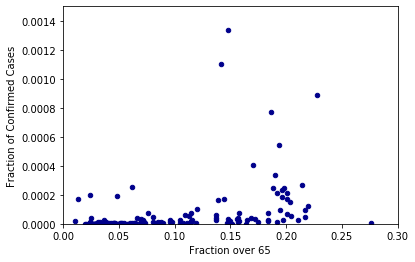

In [104]:
scatter = merged.plot.scatter(x='Fraction over 65',y='Fraction of Confirmed Cases',c='DarkBlue')
scatter.set_ylim(0,0.0015)
scatter.set_xlim(0,0.30)

# 2. Data Fusion (55 pts)

Because data about COVID-19 comes from all across the world, there are different entities collecting and publishing the data. In addition, this data is collated by different organizations in different ways. To that end, we are interested in trying to understand the values that the various sources are capturing and potentially detect when sources depend on each other.

## a. Matching (10 pts)

First, let’s load each data source (OWID, JHU, Wiki). Now, we need to attempt to line up different countries. This can be a complex procedure because we need to resolve names that can be different. For example, “DR Congo”, “Congo (Kinshasa)”, and “Democratic Republic of Congo” are all the same country described differently. Wikipedia’s redirection capabilities help here as typing any of the three strings into the search box will direct you to the same page. We can extract the ISO 3661-2 code for each country or region to better compare the datasets. Note that this two-character code is different from the three-character code that the World Bank uses

In [333]:
#Load the files
owid_df = pd.read_csv('owid-2020-03-22.csv')
jhu_df = pd.read_csv('jhu-2020-03-22.csv')
wiki_df = pd.read_csv('wiki-2020-03-22.csv')
countryCodes_df = pd.read_csv('country-codes.csv')

#Convert countryCodes_df into a Series and then convert to a dictionary
ts = pd.Series(countryCodes_df['code'].values, index=countryCodes_df['country'])
countryCodes = ts.to_dict()

#Map countryCodes from dictionary to dataFrames
owid_df['CountryCode'] = owid_df['location'].map(countryCodes)
jhu_df['CountryCode'] = jhu_df['Country/Region'].map(countryCodes)
wiki_df['CountryCode'] = wiki_df['country'].map(countryCodes)
jhu_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude,CountryCode
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-23,NaN,NaN,CN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,2020-01-23,NaN,NaN,CN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,2020-01-23,NaN,NaN,CN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-23,NaN,NaN,CN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,2020-01-23,NaN,NaN,CN
...,...,...,...,...,...,...,...,...,...,...
7612,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0,2020-03-22,49.1900,-2.110,JE
7613,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0,2020-03-22,18.2000,-66.500,PR
7614,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0,2020-03-22,-1.4400,15.556,CG
7615,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0,2020-03-22,24.2500,-76.000,BS


## b. Grouping (10 pts)

In the JHU data, you will notice that the data is broken down into provinces and states for some countries. We will be comparing across countries so we need to sum all of the Confirmed, Deaths, and Recovered numbers for each Country/Region and Date. Use pandas’ groupby method to sum these three fields by country and date.

In [338]:
new_jhu_df = jhu_df.groupby(['Country/Region','date', 'CountryCode']).sum().reset_index()
new_jhu_df

,Country/Region,date,CountryCode,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Azerbaijan,2020-02-29,AZ,1.0,0.0,0.0,0.0000,0.0000
1,Afghanistan,2020-02-25,AF,1.0,0.0,0.0,0.0000,0.0000
2,Afghanistan,2020-02-26,AF,1.0,0.0,0.0,0.0000,0.0000
3,Afghanistan,2020-02-27,AF,1.0,0.0,0.0,0.0000,0.0000
4,Afghanistan,2020-02-28,AF,1.0,0.0,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...
3676,occupied Palestinian territory,2020-03-13,PS,0.0,0.0,0.0,31.9522,35.2332
3677,occupied Palestinian territory,2020-03-15,PS,0.0,0.0,0.0,31.9522,35.2332
3678,occupied Palestinian territory,2020-03-16,PS,0.0,0.0,0.0,31.9522,35.2332
3679,occupied Palestinian territory,2020-03-17,PS,0.0,0.0,0.0,31.9522,35.2332


## c. Merging (10 pts)

Using the country codes we added to each dataset in Part a, we want to merge the three datasets together. We need to do this both by country code and date because we don’t want to merge the data from different dates. Merging three datasets will require two merge calls. Finally, set the index to be a MultiIndex that includes both the country code and date.

In [335]:
#The first merge. Merging wiki_df and owid_df dataFrames together on CountryCode and date
merged2 = pd.merge(wiki_df, owid_df, how='left', left_on=['CountryCode', 'date'], right_on=['CountryCode', 'date'])
merged2

,date,country,cases,deaths,recoveries,CountryCode,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-01-29,Mainland China,5951.0,136.0,NaN,CN,China,1466.0,26.0,5994.0,132.0
1,2020-01-29,Thailand,14.0,0.0,NaN,TH,Thailand,0.0,0.0,14.0,0.0
2,2020-01-29,Hong Kong,8.0,0.0,NaN,HK,NaN,NaN,NaN,NaN,NaN
3,2020-01-29,Taiwan,8.0,0.0,NaN,TW,Taiwan,1.0,0.0,8.0,0.0
4,2020-01-29,Japan,7.0,0.0,NaN,JP,Japan,3.0,0.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3731,2020-03-22,St. Vincent and the Grenadines,1.0,0.0,0.0,VC,NaN,NaN,NaN,NaN,NaN
3732,2020-03-22,Somalia,1.0,0.0,0.0,SO,Somalia,0.0,0.0,1.0,0.0
3733,2020-03-22,East Timor,1.0,0.0,0.0,TL,Timor,1.0,0.0,1.0,0.0
3734,2020-03-22,Uganda,1.0,0.0,0.0,UG,Uganda,1.0,0.0,1.0,0.0


In [339]:
#The second merge. Merging the merged dataFrame and new_jhu_df dataFrame together on CountryCode and date
merged3 = pd.merge(merged2, new_jhu_df, how='left', left_on=['CountryCode', 'date'], right_on=['CountryCode', 'date'])
merged3

,date,country,cases,deaths,recoveries,CountryCode,location,new_cases,new_deaths,total_cases,total_deaths,Country/Region,Confirmed,Deaths,Recovered,Latitude,Longitude
0,2020-01-29,Mainland China,5951.0,136.0,NaN,CN,China,1466.0,26.0,5994.0,132.0,Mainland China,5494.0,131.0,101.0,0.0000,0.0000
1,2020-01-29,Thailand,14.0,0.0,NaN,TH,Thailand,0.0,0.0,14.0,0.0,Thailand,14.0,0.0,5.0,0.0000,0.0000
2,2020-01-29,Hong Kong,8.0,0.0,NaN,HK,NaN,NaN,NaN,NaN,NaN,Hong Kong,8.0,0.0,0.0,0.0000,0.0000
3,2020-01-29,Taiwan,8.0,0.0,NaN,TW,Taiwan,1.0,0.0,8.0,0.0,Taiwan,8.0,0.0,0.0,0.0000,0.0000
4,2020-01-29,Japan,7.0,0.0,NaN,JP,Japan,3.0,0.0,7.0,0.0,Japan,7.0,0.0,1.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,2020-03-22,St. Vincent and the Grenadines,1.0,0.0,0.0,VC,NaN,NaN,NaN,NaN,NaN,Saint Vincent and the Grenadines,1.0,0.0,0.0,12.9843,-61.2872
3749,2020-03-22,Somalia,1.0,0.0,0.0,SO,Somalia,0.0,0.0,1.0,0.0,Somalia,1.0,0.0,0.0,5.1521,46.1996
3750,2020-03-22,East Timor,1.0,0.0,0.0,TL,Timor,1.0,0.0,1.0,0.0,East Timor,1.0,0.0,0.0,-8.5500,125.5600
3751,2020-03-22,Uganda,1.0,0.0,0.0,UG,Uganda,1.0,0.0,1.0,0.0,Uganda,1.0,0.0,0.0,1.0000,32.0000


In [347]:
#Set index to MultiIndex with CountryCode and date
merged3.set_index(['CountryCode', 'date'])

,,country,cases,deaths,recoveries,location,new_cases,new_deaths,total_cases,total_deaths,Country/Region,Confirmed,Deaths,Recovered,Latitude,Longitude
CountryCode,date,,,,,,,,,,,,,,,
CN,2020-01-29,Mainland China,5951.0,136.0,NaN,China,1466.0,26.0,5994.0,132.0,Mainland China,5494.0,131.0,101.0,0.0000,0.0000
TH,2020-01-29,Thailand,14.0,0.0,NaN,Thailand,0.0,0.0,14.0,0.0,Thailand,14.0,0.0,5.0,0.0000,0.0000
HK,2020-01-29,Hong Kong,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Hong Kong,8.0,0.0,0.0,0.0000,0.0000
TW,2020-01-29,Taiwan,8.0,0.0,NaN,Taiwan,1.0,0.0,8.0,0.0,Taiwan,8.0,0.0,0.0,0.0000,0.0000
JP,2020-01-29,Japan,7.0,0.0,NaN,Japan,3.0,0.0,7.0,0.0,Japan,7.0,0.0,1.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VC,2020-03-22,St. Vincent and the Grenadines,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Saint Vincent and the Grenadines,1.0,0.0,0.0,12.9843,-61.2872
SO,2020-03-22,Somalia,1.0,0.0,0.0,Somalia,0.0,0.0,1.0,0.0,Somalia,1.0,0.0,0.0,5.1521,46.1996
TL,2020-03-22,East Timor,1.0,0.0,0.0,Timor,1.0,0.0,1.0,0.0,East Timor,1.0,0.0,0.0,-8.5500,125.5600


## d. Fusion (15 pts)

Determine which fields of each dataset link together. For example, the total_cases field in the Our World in Data dataset matches the Confirmed field in the Johns Hopkins data and the cases field in the Wikipedia data.

To fuse the values without any knowledge about the underlying sources of the data, we can try to use an average or take the maximum or minimum. We will do this first for the number of cases. Select only the three columns related to each dataset’s total number of cases. Then, run the agg method on the rows with the aggregation functions “min”, “max”, and “mean”.Calculate the same results for deaths and recoveries, but note that the Our World in Data dataset does not have recoveries so there will only be two columns

In [578]:
#For total cases
totalCases = merged3[['cases','total_cases','Confirmed']]
min = totalCases.agg("min", axis="columns")
max = totalCases.agg("max", axis="columns")
mean = totalCases.agg("mean", axis="columns")
result = pd.concat([totalCases, min,max,mean], axis=1)
result.columns = ['cases', 'total_cases', 'Confirmed', 'min', 'max', 'mean']
finalTotalCases = merged3[['CountryCode','date']]
finalTotalCases = pd.concat([finalTotalCases,result], axis=1)
finalTotalCases.dropna(subset = ["CountryCode"], inplace=True)
finalTotalCases.drop(['Confirmed', 'cases', 'total_cases'], axis=1)

,CountryCode,date,min,max,mean
0,CN,2020-01-29,5494.0,5994.0,5813.0
1,TH,2020-01-29,14.0,14.0,14.0
2,HK,2020-01-29,8.0,8.0,8.0
3,TW,2020-01-29,8.0,8.0,8.0
4,JP,2020-01-29,7.0,7.0,7.0
...,...,...,...,...,...
3748,VC,2020-03-22,1.0,1.0,1.0
3749,SO,2020-03-22,1.0,1.0,1.0
3750,TL,2020-03-22,1.0,1.0,1.0
3751,UG,2020-03-22,1.0,1.0,1.0


In [579]:
#For total deaths
totalDeaths = merged3[['deaths','total_deaths','Deaths']]
min = totalDeaths.agg("min", axis="columns")
max = totalDeaths.agg("max", axis="columns")
mean = totalDeaths.agg("mean", axis="columns")
result = pd.concat([totalDeaths, min,max,mean], axis=1)
result.columns = ['deaths', 'total_deaths', 'Deaths', 'min', 'max', 'mean']
finaltotalDeaths = merged3[['CountryCode','date']]
finaltotalDeaths = pd.concat([finaltotalDeaths,result], axis=1)
finaltotalDeaths.drop(['deaths', 'total_deaths', 'Deaths'], axis=1)

,CountryCode,date,min,max,mean
0,CN,2020-01-29,131.0,136.0,133.0
1,TH,2020-01-29,0.0,0.0,0.0
2,HK,2020-01-29,0.0,0.0,0.0
3,TW,2020-01-29,0.0,0.0,0.0
4,JP,2020-01-29,0.0,0.0,0.0
...,...,...,...,...,...
3748,VC,2020-03-22,0.0,0.0,0.0
3749,SO,2020-03-22,0.0,0.0,0.0
3750,TL,2020-03-22,0.0,0.0,0.0
3751,UG,2020-03-22,0.0,0.0,0.0


In [580]:
#For total recoveries
totalRecoveries = merged3[['recoveries','Recovered']]
min = totalRecoveries.agg("min", axis="columns")
max = totalRecoveries.agg("max", axis="columns")
mean = totalRecoveries.agg("mean", axis="columns")
result = pd.concat([totalRecoveries, min,max,mean], axis=1)
result.columns = ['recoveries','Recovered', 'min', 'max', 'mean']
finaltotalRecoveries = merged3[['CountryCode','date']]
finaltotalRecoveries = pd.concat([finaltotalRecoveries,result], axis=1)
finaltotalRecoveries.drop(['recoveries','Recovered'], axis=1)

,CountryCode,date,min,max,mean
0,CN,2020-01-29,101.0,101.0,101.0
1,TH,2020-01-29,5.0,5.0,5.0
2,HK,2020-01-29,0.0,0.0,0.0
3,TW,2020-01-29,0.0,0.0,0.0
4,JP,2020-01-29,1.0,1.0,1.0
...,...,...,...,...,...
3748,VC,2020-03-22,0.0,0.0,0.0
3749,SO,2020-03-22,0.0,0.0,0.0
3750,TL,2020-03-22,0.0,0.0,0.0
3751,UG,2020-03-22,0.0,0.0,0.0


## e. Analysis (10 pts)

First, find the date and country for which the difference between the minimum number of cases and the maximum number of cases is largest.

In [581]:
index = (finalTotalCases['max'] - finalTotalCases['min']).idxmax()
print("Country code: " + finalTotalCases['CountryCode'].loc[index])
print("Date: " + finalTotalCases['date'].loc[index])

Country code: CN
Date: 2020-03-13


Second, plot a line graph of the mean number of cases for China (CN), South Korea (KR), the United States (US), and Italy (IL), based on the three datasets.

In [658]:
lineGraph = finaltotalDeaths.drop(['deaths', 'total_deaths', 'Deaths','min','max'], axis=1)
lineGraph = lineGraph[(lineGraph.CountryCode == 'CN') | (lineGraph.CountryCode == 'KR') | (lineGraph.CountryCode == 'US') | (lineGraph.CountryCode == 'IL')]
lineGraph = lineGraph.set_index(['CountryCode','date'], append=True)
lineGraph

,,,mean
,CountryCode,date,
0,CN,2020-01-29,133.000000
9,US,2020-01-29,0.000000
12,KR,2020-01-29,0.000000
20,CN,2020-01-30,157.666667
30,US,2020-01-30,0.000000
...,...,...,...
3422,IL,2020-03-21,0.666667
3574,CN,2020-03-22,3260.333333
3576,US,2020-03-22,319.333333


In [661]:
graph = lineGraph.unstack(level='CountryCode')
graph

mean                                  
CountryCode               CN        IL          KR          US
     date                                                     
0    2020-01-29   133.000000       NaN         NaN         NaN
9    2020-01-29          NaN       NaN         NaN    0.000000
12   2020-01-29          NaN       NaN    0.000000         NaN
20   2020-01-30   157.666667       NaN         NaN         NaN
30   2020-01-30          NaN       NaN         NaN    0.000000
...                      ...       ...         ...         ...
3422 2020-03-21          NaN  0.666667         NaN         NaN
3574 2020-03-22  3260.333333       NaN         NaN         NaN
3576 2020-03-22          NaN       NaN         NaN  319.333333
3581 2020-03-22          NaN       NaN  102.666667         NaN
3598 2020-03-22          NaN  1.000000         NaN         NaN

[194 rows x 4 columns]

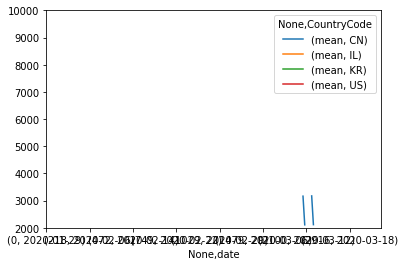

In [665]:
plotLine = graph.plot.line()
plotLine.set_ylim(2000,10000)
plotLine